# Protection of customers' personal data

You need to protect the data of your customers at Flood Insurance Company. Develop such a method of data conversion that it would be difficult to recover personal information from it. Justify the correctness of its work.

You need to protect the data so that the quality of machine learning models does not deteriorate during transformation. It is not necessary to select the best model.

## Loading data

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from random import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [25]:
def displayGeneralDataInfo(data):
    """
    Function for outputting general information
    data - data(dataframes)
    """
    print("Выведем первые 5 строк таблицы.")
    print()
    # first 5 lines output 
    display(data.head())
    print("Выведем общую информацию ")
    print()
    # general information output
    display(data.info())
    print("Посмотрим на значения, распределения в нашем DataFrame.")
    print()
    # output values, distributions in our DataFrame.
    display(data.describe().T)
    print("Посмотрим на корреляцию.")
    print()
    # correlation output
    display(data.corr())
    print()


In [26]:
displayGeneralDataInfo(df)


Выведем первые 5 строк таблицы.



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Выведем общую информацию 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Посмотрим на значения, распределения в нашем DataFrame.



,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


Посмотрим на корреляцию.



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


- There are no missing values. 
- There are no negative values.
- The columns are capitalized. It is necessary to convert the columns to the same case for further work.

Let's look at the distributions in the data. Let's write a function to display the distribution. Set the parameters for displaying the graphs

In [27]:
%matplotlib inline
small, medium, large = 14, 16, 22
params = {'figure.figsize':   (14, 5),
          'figure.titlesize': medium,
          'legend.fontsize':  small,
          'axes.titlesize':   small,
          'axes.labelsize':   small,
          'xtick.labelsize':  small,
          'ytick.labelsize':  small,
          'legend.loc':       'best'}
plt.rcParams.update(params)

In [28]:
def dataDistribution(df,column,title):
    """
    The function outputs the distributions in the data
    df - dataframe
    column - column
    title - title
    x_label - name of x-axis
    y_label - y-axis name
    """
    sns.kdeplot(data=df[column], label=column, shade=True)
    plt.title(title)
    plt.legend()
    plt.show()

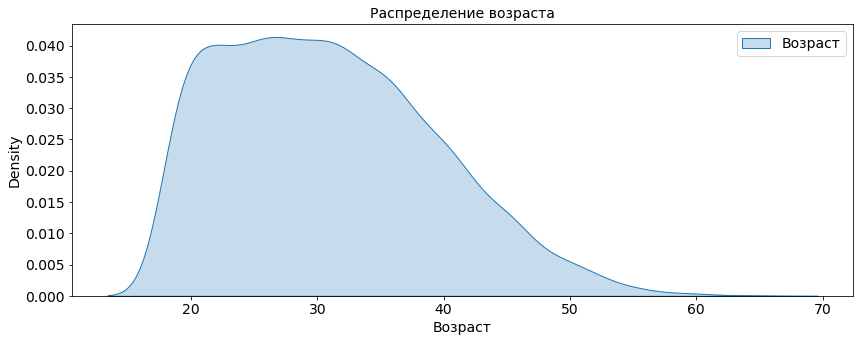

In [29]:
dataDistribution(df, 'Возраст', "Распределение возраста")


Most values are in the range of 20 to 35-40 years.

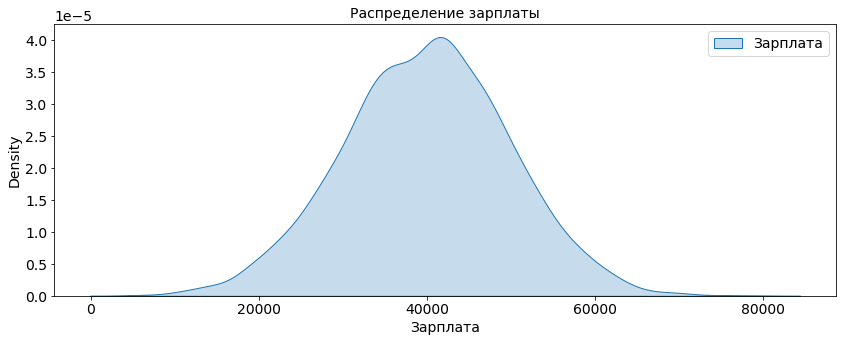

In [30]:
dataDistribution(df, 'Зарплата', "Распределение зарплаты")


The distribution is normal. On average, the client receives about 40000 rubles. Most of the values are in the range from 25 to 55 thousand rubles.



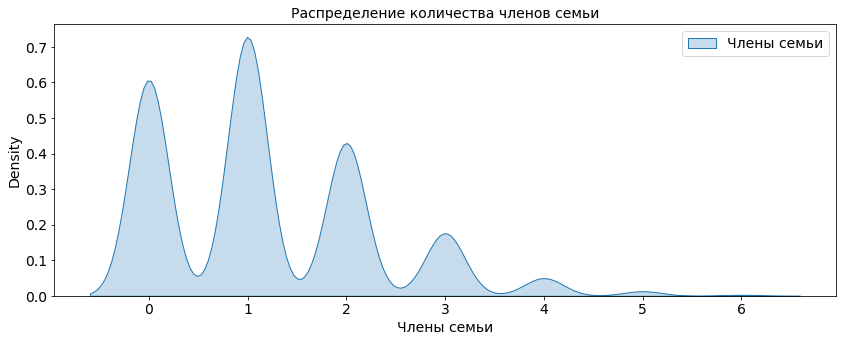

In [31]:
dataDistribution(df, 'Члены семьи', "Распределение количества членов семьи")


        Most clients either have no family or have a partner but no children.



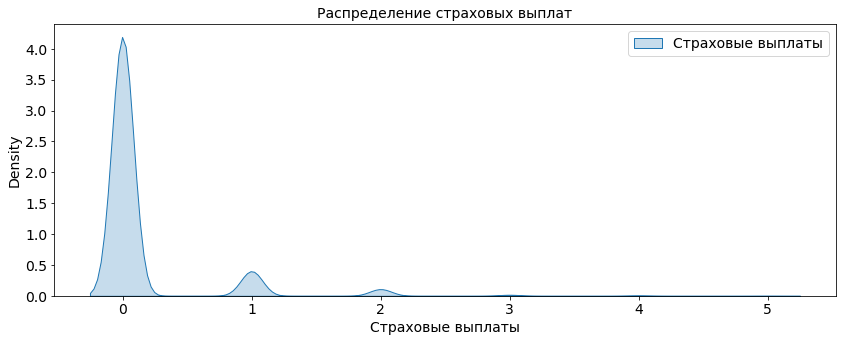

In [32]:
dataDistribution(df, 'Страховые выплаты', "Распределение страховых выплат")


    Most clients don't have insurance benefits.



**Conclusion:**
- Age: Most values range from 20 to 35-40 years old.
- Salary: We see a normal distribution. On average, the client receives about 40000 rubles. Most values are in the range of 25 to 55 thousand rubles.
- Family members: Most clients do not have a family or have a family but without children.
- Insurance payments: Most clients have no insurance payments.

It can be concluded that the signs are distributed without outliers and anomalies. Next, let's look at the interrelation of attributes:




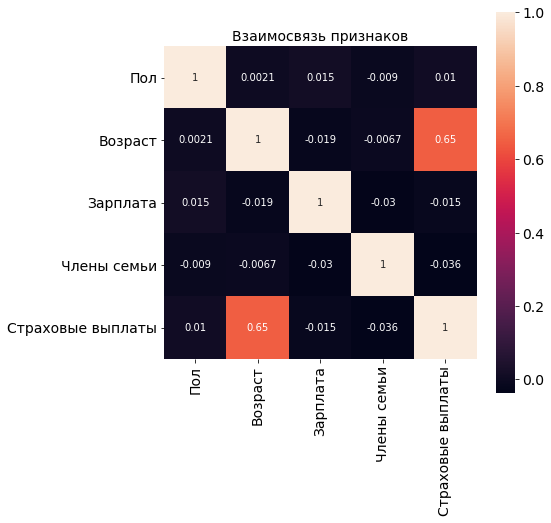

In [33]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(df.corr(),annot = True, fmt = '.2g', ax=ax, square=True)
plt.title('Взаимосвязь признаков')
plt.show() 

In [34]:
df['Страховые выплаты'].corr(df['Возраст'])


0.6510300979467255

It can be concluded that the target attribute is most influenced by the age of the client - the correlation coefficient is 0.65

Let's lowercase the names of the columns

In [35]:
df.columns = df.columns.str.lower()
df.columns

Index(['пол', 'возраст', 'зарплата', 'члены семьи', 'страховые выплаты'], dtype='object')

Check the data for duplicates

In [36]:
df.duplicated().sum()


153

We'll remove 153 duplicates

In [37]:
df = df.drop_duplicates().reset_index(drop=True)


Let's see how many properties we have left.



In [38]:
print(f'Количество обьектов: {df.shape[0]}')


Количество обьектов: 4847


## Matrix multiplication

Denotations:

- $X$ - feature matrix (zero column consists of units)

- $y$ - vector of target attribute

- $P$ - matrix by which the signs are multiplied

- $w$ - vector of linear regression weights (zero element is equal to the shift)

Predictions:

$$
a = Xw
$$

Learning Objective:

$$
w = \arg\min_w MSE(Xw, y)
$$

Learning Formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Answer:** when multiplied by a reversible matrix, the quality of the model will not change - the value of the metric remains the same.

**Rationale:** 
Let $X$ be a feature matrix of dimension $(n, m)$ and a target feature vector $y$ of dimension $(n, 1)$. Let $w$ be a vector of linear regression weights of dimension $(m, 1)$.

Then the predictions $a$ of the linear regression model can be computed as:
a=Xw

If we multiply matrix $X$ by some reversible matrix $P$ on the left side, we get a new matrix $X' = PX$

If we replace matrix $X$ by $X'$ in the formula for weights $w$, we get a new formula for weights $w'$:

\begin{aligned}
w' &= ((PX)^T(PX))^{-1}(PX)^Ty \
&= (X^TP^TPX)^{-1}X^TP^Ty \
&= (X^TX)^{-1}(P^T)^{-1}P^TX^Ty \
&= w
\end{aligned}

The last equality is true because $(P^T)^{-1}P^T = I$, where $I$ is a unit matrix. Thus, when multiplied by a reversible matrix, the quality of the model will not change and the value of the metric will remain the same.


**Rationale:**

Properties used:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
Proof:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$
\
It is required to prove that the predictions will not change, we have  $a =  Xw$,   $a' = X'w'$
\
\
$$
    w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^T X^T y
$$
Since the matrix is reversible, the product $(P^T)^{-1} P^T$ is equal to the unit matrix:
$$
w' = P^{-1}(X^TX)^{-1} X^T y
$$
$$
w' = P^{-1} w
$$
We then substitute the new value into the formula to find the predictions:
$$
a' = (XP)wp = XPP^{-1}w
$$
$$
a' = Xw = a
$$

## Conversion Algorithm

**Algorithm**

- create a random matrix;
- check it for reversibility;
- multiply the features by the resulting matrix;
- find the R2 metric on the original and transformed data and compare them with each other.

**Rationale**.

multiplication of the feature matrix by a reversible matrix will not change the linear dependence between the features and the target feature, as it will simply be a change of basis in the feature space.

Thus, if the original feature matrix was linearly dependent and did not satisfy the reversibility condition, then the resulting feature matrix will also be linearly dependent. If the original feature matrix was linearly independent, then the resulting feature matrix will also be linearly independent.

It follows that the metric R2 on the original and transformed data should be the same, since the linear dependence of the attributes and the target attribute will not change.

## Checking the algorithm

We divide the data into training and test samples and define the features:



In [39]:
df_train, df_test = train_test_split(df, test_size=0.4, random_state=12345)


In [41]:
features_test_init = df_test.drop(['страховые выплаты'], axis=1)
target_test = df_test['страховые выплаты']

features_train_init = df_train.drop(['страховые выплаты'], axis=1)
target_train = df_train['страховые выплаты']

Train the linear regression model on the original data and find the value of the R2 metric:



In [42]:
model = LinearRegression() 
model.fit(features_train_init, target_train) 
predictions_test = model.predict(features_test_init) 
r2_init = r2_score(target_test, predictions_test)

Next, we will create a reversible matrix with dimensionality equal to the number of features. For this purpose, we will generate random matrices until we obtain a matrix with a non-zero determinant:

In [43]:
det = 0
while det == 0:
    random_matrix = np.random.randint(500, size=(features_test_init.shape[1], features_test_init.shape[1]))
    det = np.linalg.det(random_matrix) 

Let's multiply the signs by the generated random matrix:



In [44]:
features_test_conv = features_test_init.dot(random_matrix)
features_train_conv = features_train_init.dot(random_matrix)
features_test_conv.head()

,0,1,2,3
1321,618166.0,11236600.0,16811978.0,11147318.0
3767,863021.0,15688298.0,23472598.0,15563605.0
166,447692.0,8073040.0,12081012.0,8012064.0
2935,258981.0,4598778.0,6885654.0,4568293.0
423,366946.0,6551232.0,9807514.0,6505894.0


You can decipher the data by multiplying by the inverse of the matrix created and rounding the values:



In [45]:
np.round(features_test_conv.dot(np.linalg.inv(random_matrix))).head()


,0,1,2,3
1321,1.0,23.0,47200.0,-0.0
3767,1.0,32.0,65900.0,-0.0
166,1.0,33.0,33900.0,2.0
2935,0.0,39.0,19300.0,2.0
423,-0.0,46.0,27500.0,2.0


We train a linear regression model on the transformed data and compare the value of the R2 metric:



In [47]:
model = LinearRegression() 
model.fit(features_train_conv, target_train) 
predictions_test = model.predict(features_test_conv) 
r2_conv = r2_score(target_test, predictions_test)
print('R2 модели на исходных данных:       ', r2_conv)
print('R2 модели на преобразованных данных:', r2_init)
print('Pазница:', r2_init-r2_conv)

R2 модели на исходных данных:        0.42726613438114014
R2 модели на преобразованных данных: 0.4272661343811538
Pазница: 1.3655743202889425e-14


The values of the R2 metric are almost the same, and the quality of the regression does not change.



**Conclusion**

According to the results of the conducted research, we can conclude that the proposed algorithm fulfills the set task - when multiplying the feature matrix by a random reversible matrix, visually the data is distorted, but the quality of regression does not change.